In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 [=====>........................] - ETA: 1s - loss: 2.3011 - accuracy: 0.0234
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 1s 42ms/step - loss: 2.2775 - accuracy: 0.0472 - val_loss: 2.2299 - val_accuracy: 0.0094
Epoch 2/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2578 - accuracy: 0.0547
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 2.2151 - accuracy: 0.0912 - val_loss: 2.1838 - val_accuracy: 0.0991
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2322 - accuracy: 0.0547
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 2.1735 - accuracy: 0.1321 - val_loss: 2.1412 - val_accuracy: 0.1462
Epoch 4/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.1687 - accuracy: 0.1094
Epoch 4: sav

5/5 [==============================] - 0s 12ms/step - loss: 0.9166 - accuracy: 0.6682 - val_loss: 0.7210 - val_accuracy: 0.7500
Epoch 29/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9205 - accuracy: 0.7188
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.8687 - accuracy: 0.6730 - val_loss: 0.6922 - val_accuracy: 0.7547
Epoch 30/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.9164 - accuracy: 0.6016
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 0.8577 - accuracy: 0.6588 - val_loss: 0.6660 - val_accuracy: 0.7547
Epoch 31/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.7953 - accuracy: 0.7500
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.8362 - accuracy: 0.6871 - val_loss: 0.

Epoch 56/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.8203
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.5199 - accuracy: 0.7940 - val_loss: 0.3770 - val_accuracy: 0.9151
Epoch 57/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5138 - accuracy: 0.8125
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.5187 - accuracy: 0.7987 - val_loss: 0.3709 - val_accuracy: 0.9198
Epoch 58/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5636 - accuracy: 0.7734
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.5310 - accuracy: 0.7956 - val_loss: 0.3655 - val_accuracy: 0.9245
Epoch 59/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.4811 - accuracy: 0.8203
Epoch

1/5 [=====>........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.8203
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.4354 - accuracy: 0.8192 - val_loss: 0.2682 - val_accuracy: 0.9387
Epoch 84/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.4800 - accuracy: 0.7969
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.4431 - accuracy: 0.8192 - val_loss: 0.2665 - val_accuracy: 0.9623
Epoch 85/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.8281
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.4554 - accuracy: 0.8208 - val_loss: 0.2639 - val_accuracy: 0.9623
Epoch 86/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.8594
Epoch 86: saving mo

1/5 [=====>........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.8516
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.3776 - accuracy: 0.8601 - val_loss: 0.2071 - val_accuracy: 0.9811
Epoch 111/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8750
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.3479 - accuracy: 0.8695 - val_loss: 0.2060 - val_accuracy: 0.9858
Epoch 112/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8828
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.3619 - accuracy: 0.8616 - val_loss: 0.2042 - val_accuracy: 0.9858
Epoch 113/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.8281
Epoch 113: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8906
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.3278 - accuracy: 0.8789 - val_loss: 0.1549 - val_accuracy: 0.9906
Epoch 138/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.9375
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.3194 - accuracy: 0.8758 - val_loss: 0.1540 - val_accuracy: 0.9906
Epoch 139/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8359
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.3316 - accuracy: 0.8664 - val_loss: 0.1519 - val_accuracy: 0.9906
Epoch 140/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3509 - accuracy: 0.8594
Epoch 140: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8828
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2891 - accuracy: 0.8994 - val_loss: 0.1127 - val_accuracy: 1.0000
Epoch 165/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.9141
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2821 - accuracy: 0.9041 - val_loss: 0.1120 - val_accuracy: 1.0000
Epoch 166/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8984
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.3074 - accuracy: 0.8852 - val_loss: 0.1108 - val_accuracy: 1.0000
Epoch 167/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.9609
Epoch 167: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9062
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2422 - accuracy: 0.9119 - val_loss: 0.0811 - val_accuracy: 1.0000
Epoch 192/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8984
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2907 - accuracy: 0.8915 - val_loss: 0.0803 - val_accuracy: 1.0000
Epoch 193/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1931 - accuracy: 0.9219
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2668 - accuracy: 0.9057 - val_loss: 0.0786 - val_accuracy: 1.0000
Epoch 194/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.9141
Epoch 194: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.9141
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2276 - accuracy: 0.9072 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 219/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8984
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2560 - accuracy: 0.9135 - val_loss: 0.0570 - val_accuracy: 1.0000
Epoch 220/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9141
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2321 - accuracy: 0.9119 - val_loss: 0.0564 - val_accuracy: 1.0000
Epoch 221/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.9219
Epoch 221: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.8906
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 0.2139 - accuracy: 0.9277 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 246/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.9219
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2350 - accuracy: 0.9135 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 247/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9062
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2149 - accuracy: 0.9245 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 248/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1694 - accuracy: 0.9453
Epoch 248: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.1772 - accuracy: 0.9141
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2091 - accuracy: 0.9182 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 273/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2055 - accuracy: 0.9141
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2131 - accuracy: 0.9182 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 274/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1955 - accuracy: 0.9141
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1901 - accuracy: 0.9308 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 275/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2130 - accuracy: 0.8828
Epoch 275: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.8984
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1861 - accuracy: 0.9245 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 300/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1355 - accuracy: 0.9453
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1875 - accuracy: 0.9371 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 301/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1538 - accuracy: 0.9375
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1956 - accuracy: 0.9355 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 302/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1338 - accuracy: 0.9688
Epoch 302: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.1856 - accuracy: 0.9531
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 0.1726 - accuracy: 0.9434 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 327/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8984
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1615 - accuracy: 0.9418 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 328/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1526 - accuracy: 0.9297
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1842 - accuracy: 0.9230 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 329/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1612 - accuracy: 0.9375
Epoch 329: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9219
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1977 - accuracy: 0.9214 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 354/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1574 - accuracy: 0.9297
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1681 - accuracy: 0.9387 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 355/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.9219
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.2051 - accuracy: 0.9292 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 356/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2026 - accuracy: 0.9219
Epoch 356: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.1883 - accuracy: 0.9297
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1769 - accuracy: 0.9371 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 381/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.9062
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1494 - accuracy: 0.9465 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 382/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1205 - accuracy: 0.9766
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1600 - accuracy: 0.9450 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 383/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1751 - accuracy: 0.9297
Epoch 383: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.1897 - accuracy: 0.9219
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1449 - accuracy: 0.9497 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 408/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1227 - accuracy: 0.9453
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.1552 - accuracy: 0.9465 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 409/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1193 - accuracy: 0.9766
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 13ms/step - loss: 0.1618 - accuracy: 0.9497 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 410/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.1832 - accuracy: 0.9219
Epoch 410: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.86620327e-09 3.54843144e-03 9.21627134e-03 1.22533289e-10
 1.52037046e-11 1.29494445e-11 7.22956287e-12 3.00757579e-11
 9.87235248e-01]
8


# 混同行列

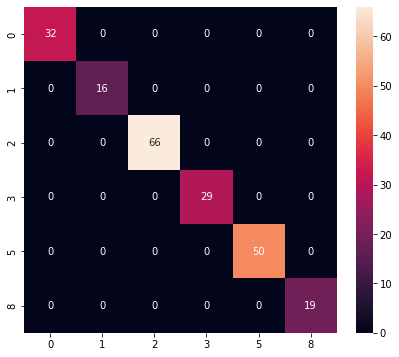

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        19

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Gabriel\AppData\Local\Temp\tmpgueebnpe\assets


6640

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.8662090e-09 3.5484368e-03 9.2162630e-03 1.2253329e-10 1.5203736e-11
 1.2949446e-11 7.2295637e-12 3.0075765e-11 9.8723537e-01]
8
